In [17]:
from simple_exact_diagonalization_routines.local_matrix_class import *
from scipy.linalg import expm
import matplotlib.pyplot as plt

# System size
L = 9

# Create objects of Pauli operators
X = X_class(L)
Y = Y_class(L)
Z = Z_class(L)
S_plus = S_plus_class(L)
S_minus = S_minus_class(L)

# Trivial initialization of the right size matrix
H_TFIM = 0*np.eye( 2**L ) 

for x in range(L-1):
    H_TFIM = H_TFIM + 2*X.at(x+1).dot(X.at(x+2)) + Z.at(x+1)
H_TFIM = H_TFIM + Z.at(L)    

# Trivial initialization of the right size matrix
hamiltonian_name = "TLFIM_L_" +str(L)
H_TLFIM = 0*np.eye( 2**L ) 

for x in range(L-1):
    H_TLFIM = H_TLFIM + 2*X.at(x+1).dot(X.at(x+2)) + Z.at(x+1)+ X.at(x+1)
H_TLFIM = H_TLFIM + Z.at(L)    + X.at(L) 

In [18]:
from class_double_bracket_flow import *


flow = double_bracket_flow( H_TLFIM )

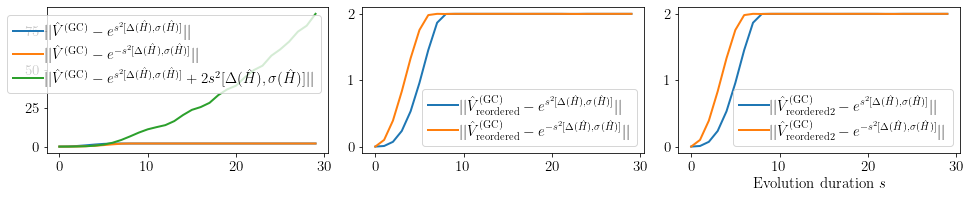

In [26]:
norms_commutator_plus = []
norms_commutator_minus = []
norms_commutator_plus_subtract = []
norms_commutator_plus_reordered = []
norms_commutator_minus_reordered = []

norms_commutator_plus_reordered_2 = []
norms_commutator_minus_reordered_2 = []
flow.run_param_rc(fontsize=15)
plt.rcParams['legend.fontsize'] = 15
for i,s in enumerate(np.linspace(0,1,30)):
    V_d = expm( 1j*s*flow.delta( H_TFIM) )
    V_o = expm( 1j*s*flow.sigma( H_TFIM) )
    V_H = expm( 1j*s* H_TFIM) 

    V_GC = V_d.dot(V_H).dot(V_d.conj().T).dot(V_H.conj().T)
    V_plus = expm( s**2* flow.commutator( flow.delta(H_TFIM),flow.sigma(H_TFIM)) )
    V_minus = expm( -s**2* flow.commutator( flow.delta(H_TFIM),flow.sigma(H_TFIM)) )

    V_GC_reordered = V_H.dot(V_d).dot(V_H.conj().T).dot(V_d.conj().T)
    
    V_GC_reordered_2 = V_H.conj().T.dot(V_d.conj().T).dot(V_H).dot(V_d)
    
    norms_commutator_plus.append(
    np.linalg.norm(V_GC -V_plus ,2))
    norms_commutator_minus.append(
    np.linalg.norm(V_GC -V_minus,2 ))
    norms_commutator_plus_subtract.append(
    np.linalg.norm(V_GC -V_plus +2*s**2* flow.commutator( flow.delta(H_TFIM),flow.sigma(H_TFIM)),2))

    norms_commutator_plus_reordered.append(
    np.linalg.norm(V_GC_reordered -V_plus ,2))
    norms_commutator_minus_reordered.append(
    np.linalg.norm(V_GC_reordered -V_minus,2 ))
    
    
    norms_commutator_plus_reordered_2.append(
    np.linalg.norm(V_GC_reordered_2 -V_plus ,2))
    norms_commutator_minus_reordered_2.append(
    np.linalg.norm(V_GC_reordered_2 -V_minus,2 ))

plt.figure(figsize=(14,3))
plt.subplot(1,3,1)    
plt.plot(norms_commutator_plus, label=r'$\vert\vert \hat V^{\mathrm{(GC)}}-e^{ s^2[\Delta(\hat H),\sigma(\hat H)]}\vert\vert$')
plt.plot(norms_commutator_minus, label = r'$\vert\vert \hat V^{\mathrm{(GC)}}-e^{- s^2[\Delta(\hat H),\sigma(\hat H)]}\vert\vert$')
plt.plot(norms_commutator_plus_subtract, label = r'$\vert\vert \hat V^{\mathrm{(GC)}}-e^{ s^2[\Delta(\hat H),\sigma(\hat H)]}+2s^2[\Delta(\hat H),\sigma(\hat H)]\vert\vert$')
plt.legend()
plt.subplot(1,3,2)
plt.plot(norms_commutator_plus_reordered, label=r'$\vert\vert \hat V^{\mathrm{(GC)}}_\mathrm{reordered}-e^{ s^2[\Delta(\hat H),\sigma(\hat H)]}\vert\vert$')
plt.plot(norms_commutator_minus_reordered, label = r'$\vert\vert \hat V^{\mathrm{(GC)}}_\mathrm{reordered}-e^{- s^2[\Delta(\hat H),\sigma(\hat H)]}\vert\vert$')
plt.legend()

plt.subplot(1,3,3)
plt.plot(norms_commutator_plus_reordered_2, label=r'$\vert\vert \hat V^{\mathrm{(GC)}}_\mathrm{reordered 2}-e^{ s^2[\Delta(\hat H),\sigma(\hat H)]}\vert\vert$')

plt.plot(norms_commutator_minus_reordered_2, label = r'$\vert\vert \hat V^{\mathrm{(GC)}}_\mathrm{reordered 2}-e^{- s^2[\Delta(\hat H),\sigma(\hat H)]}\vert\vert$')
plt.legend()



plt.xlabel(r'Evolution duration $s$')
plt.tight_layout()


In [29]:
norms_sigma_GC = []
norms_sigma_GWW = []
norms_sigma_GC2 = []
norms_sigma_GC3 = []
flow_times = np.linspace(0,.15,35)
for i,s in enumerate(flow_times):
    
    sp = np.sqrt(s)
    V_d = expm( 1j*sp*flow.delta( H_TFIM) )
    V_H = expm( 1j*sp* H_TFIM) 
    V_GC = V_d.dot(V_H).dot(V_d.conj().T).dot(V_H.conj().T)
    H_s = V_GC.conj().T.dot(H_TFIM).dot(V_GC)
    
    sp = np.sqrt(s/2)
    V_d = expm( 1j*sp*flow.delta( H_TFIM) )
    V_H = expm( 1j*sp* H_TFIM) 
    V_GC = V_d.dot(V_H).dot(V_d.conj().T).dot(V_H.conj().T)
    V_GC2 = V_GC.dot(V_GC)

    H_s2 = V_GC2.conj().T.dot(H_TFIM).dot(V_GC2)
    sp = np.sqrt(s/4)
    V_d = expm( 1j*sp*flow.delta( H_TFIM) )
    V_H = expm( 1j*sp* H_TFIM) 

    V_GC = V_d.dot(V_H).dot(V_d.conj().T).dot(V_H.conj().T)
    V_GC4 = V_GC.dot(V_GC).dot(V_GC).dot(V_GC)
    

    H_s3 = V_GC4.conj().T.dot(H_TFIM).dot(V_GC4)
    norms_sigma_GC.append(np.linalg.norm(flow.sigma(H_s)))
    norms_sigma_GC2.append(np.linalg.norm(flow.sigma(H_s2)))
    norms_sigma_GC3.append(np.linalg.norm(flow.sigma(H_s3)))

    norms_sigma_GWW.append(np.linalg.norm(flow.sigma(flow.flow_step(s, H=H_TFIM))))

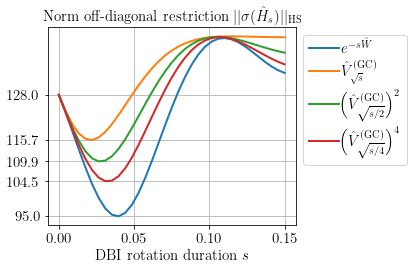

In [30]:

f=plt.figure(figsize = ( 6,4 ))
plt.plot(flow_times,norms_sigma_GWW, label=r'$ e^{-s\hat W}$')
plt.plot(flow_times,norms_sigma_GC, label=r'$\hat V^{\mathrm{(GC)}}_{\sqrt{s}}$')
plt.plot(flow_times,norms_sigma_GC2, label=r'$\biggl(\hat V^{\mathrm{(GC)}}_{\sqrt{s/2}}\biggr)^2$')
plt.plot(flow_times, norms_sigma_GC3, label=r'$\biggl(\hat V^{\mathrm{(GC)}}_{\sqrt{s/4}}\biggr)^4$')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel(r'DBI rotation duration $s$')
plt.title(r'Norm off-diagonal restriction $\vert\vert\sigma(\hat H_s)\vert\vert_\mathrm{HS}$')

norm_mins = [norms_sigma_GC[0],min(norms_sigma_GWW),min(norms_sigma_GC),min(norms_sigma_GC2),min(norms_sigma_GC3)]
y_labels_rounded = [ round(y, 1 ) for y in norm_mins ]
plt.grid()
plt.yticks(y_labels_rounded)
save_path = 'figs/Fig_more_steps_'+str(flow.nmb_flow_steps)+\
'_L_'+str(L)+'.pdf'
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.savefig( save_path, format='pdf')
plt.show()
